# Implementing ARI
Author: Gilles Richard
Date  : 2022
The program for the pre-print paper "ANALOGICAL RELEVANCE INDEX"


## ACTION 1: Importing libraries and define static variables

In [1]:
#pip3 install matplotlib pandas sklearn statistics sklearn_relief
import os
import numpy as np
from math import *
from random import randint
# FOR PLOT
from matplotlib import pyplot

# FOR CHI-SQUARE - MUTUAL INFORMATION - RELIEF
import sklearn_relief as relief

# FOR CROSS FOLD VALIDATION
from sklearn.model_selection import StratifiedKFold, KFold

# FOR TESTING ON LOGISTIC REGRESSION
from sklearn.metrics import accuracy_score

from statistics import mean

# where all utilities are defined
import utils
from utils import *

## ACTION 2: Defining binary functions in functions.py
## ACTION 3: Dataset generation, pair generation and sampling in data_generation.py
## ACTION 4: Defining utilities for chi2 and mutual information in ch2_mi.py
## ACTION 5: Defining baseline logistic regression in baseline.py
## ACTION 6: Defining ARI in ari.py
## ACTION 7: Function to validate ARI stability wrt sample size - order relevance¶

In [2]:
def display_score_latex(dimension,row_name,scores_means,scores_std):
    latex_line=""
    for i in range(dimension):
        #latex_line+=" & "+str(round(scores_means[i],2))+"-"+str(round(scores_std[i],2))
        latex_line+=" & "+str(round(scores_means[i],2))
    print(row_name+latex_line+"\\\\")
    return True

def get_ari(dataset,dimension,sample_size):  #return a list of score per feature
    list_of_attributes=[]
    for i in range(dimension):   # index of attributes
        list_of_attributes.append(i)    
    ari_scores = [0]*dimension   # ari is all 0 to start with
    list_of_pairs = all_pairs(dataset)
    ari_scores = select_features_ari(dimension,list_of_attributes,dataset,list_of_pairs)
    return ari_scores

## ACTION 8: Validate ARI stability (synthetic dataset)
Action 8 relates to Section 6.1: testing the stability of ARI
The values given might differ slightly due to random sampling of data (Table 4)

In [3]:
DATASET_GENERAL = "datasets-tested/dataset_general.csv"
filename=DATASET_GENERAL

def validate_stability(dimension,categorical_range,f,number_of_test,sample_size_list):    
    for sample_size in sample_size_list:
        size_of_X=int(pow((categorical_range+1),dimension))
        if (sample_size > size_of_X):
            print("Skip sample size ", sample_size)
            print("Sample size must be < total sample size, which is ", size_of_X)
            continue
        #mean_ari_scores = [0]*dimension
        feature_score_list=[]
        for i in range(dimension): #create a list of list of scores per feature
            feature_score_list.append([])
            
        for u in range(number_of_test):                        
            create_categorical_dataset(filename,f,dimension,sample_size,categorical_range)            
            dataset, X, y, dimension = load_dataset(filename)
            ari_scores = get_ari(dataset,dimension,sample_size)            
            for j in range(dimension): #accumulate the scores
                #mean_ari_scores[j]+=ari_scores[j]
                feature_score_list[j].append(ari_scores[j])
        
        ari_scores_means = [mean(feature_score_list[j]) for j in range(dimension)]        
        ari_scores_std  = [np.array(feature_score_list[j]).std() for j in range(dimension)]        
        display_score_latex(dimension,str(sample_size),ari_scores_means,ari_scores_std)        
    return

'''FOR ARTIFICIAL DATASET
   This section tests artificial data sets defined in functions.py
'''
dimension = 10
categorical_range = 1 #1 means binary - range of values for feature

number_of_test = 10
sample_size_list = [100,200,400,500]

list_of_functions=[g1_array,g2_array,g3_array,g4_array,g5_array,g6_array,g7_array,g8_array]

for f in list_of_functions:    
    validate_stability(dimension,categorical_range,f,number_of_test,sample_size_list)    


100 & 0.8 & 0.14 & 0.28 & 0.2 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
200 & 0.73 & 0.28 & 0.27 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
400 & 0.72 & 0.23 & 0.25 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
500 & 0.75 & 0.25 & 0.25 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
100 & 1.0 & 1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
200 & 1.0 & 1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
400 & 1.0 & 1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
500 & 1.0 & 1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
100 & 1.0 & 1.0 & 1.0 & 0.0 & 0.0 & 0.0 & 0.2 & 0.0 & 0.0 & 0.0\\
200 & 1.0 & 1.0 & 1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
400 & 1.0 & 1.0 & 1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
500 & 1.0 & 1.0 & 1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
100 & 0.55 & 0.26 & 0.29 & 0.16 & 0.24 & 0.23 & 0.18 & 0.41 & 0.21 & 0.28\\
200 & 0.25 & 0.22 & 0.27 & 0.24 & 0.25 & 0.27 & 0.25 & 0.27 & 0.2 & 0.2\\
400 & 0.24 & 0.21 & 0.22 & 0.21 & 0.26 & 0.22 &

## ACTION 9: Function to compare ARI - chi-square - mutual information - relief


In [4]:
def compare_score_on_dataset(filename,number_of_test,sample_ratio):
    dataset, X, y, dimension = load_dataset(filename)
    #INFO
    dataset_size=dataset.shape[0]
    print("****INFORMATION ON INITIAL DATA *******")
    print("dataset:",filename,"size:",dataset_size,"dimension:",dimension)

    #list of attribute as indices: 0, 1, ...
    list_of_attributes=[]
    attribute_names=[]
    for i in range(dimension):
        list_of_attributes.append(i)
        attribute_names.append("a"+str(i+1))
    #print(attribute_names)
    
    sample_size = int(dataset_size*sample_ratio)
    print(sample_size)
    mean_ari_scores    = [0]*dimension
    mean_chi_scores    = [0]*dimension
    mean_mut_scores    = [0]*dimension
    mean_relief_scores = [0]*dimension
    #print(sample_size)

    for u in range(number_of_test):
        sample_set = generate_sample_set(dataset,sample_size)
        list_of_pairs = all_pairs(sample_set)
        #print(len(list_of_pairs))
        ari_scores = select_features_ari(dimension,list_of_attributes,sample_set,list_of_pairs)
# NOT SURE WE TEST ON THE SAME SET BECAUSE OF TEST_SIZE PARAM
        X_train_enc, y_train_enc, X_test_enc=prepare_all(X, y, test_size=sample_ratio, random_state=1)
        X_train_chi, X_test_chi, fs_chi = select_all_features_chi2(X_train_enc, y_train_enc, X_test_enc)
        X_train_mut, X_test_mut, fs_mut = select_all_features_mutual(X_train_enc, y_train_enc, X_test_enc)
    
    # RELIEF
        relief_scores = relief.Relief(n_features=dimension) # we check all attributes
        my_transformed_matrix = relief_scores.fit_transform(X_train_enc,y_train_enc)

# NORMALIZATION FACTORS - All scores are normalized +0.001 to avoid division by 0
        Z_ari    = sum(ari_scores) + 0.001  #WE SHOULD TAKE INTO ACCOUNT THE VALUE 2 (meaningless)
        Z_chi    = sum(fs_chi.scores_) + 0.001
        Z_mi     = sum(fs_mut.scores_) + 0.001
        Z_relief = sum(relief_scores.w_) + 0.001
        
#UPDATE MEAN SCORES BY ADDING NORMALIZED SCORES IN [0,1]  
        for j in range(dimension):
            if ari_scores[j]!=2:
                mean_ari_scores[j]   += ari_scores[j]/(Z_ari)  # adding 2 is meaningless !!!!
            mean_chi_scores[j]   += fs_chi.scores_[j]/(Z_chi)
            mean_mut_scores[j]   += fs_mut.scores_[j]/(Z_mi)
            mean_relief_scores[j]+= relief_scores.w_[j]/(Z_relief)

    mean_ari_scores    = [a*(1/number_of_test) for a in mean_ari_scores] # NOT SURE THIS CORRECT NOW
    mean_chi_scores    = [a*(1/number_of_test) for a in mean_chi_scores]
    mean_mut_scores    = [a*(1/number_of_test) for a in mean_mut_scores]
    mean_relief_scores = [a*(1/number_of_test) for a in mean_relief_scores]
    
    ari_scores_std  = [np.array(mean_ari_scores[j]).std() for j in range(dimension)]
    chi_scores_std  = [np.array(mean_chi_scores[j]).std() for j in range(dimension)]
    mut_scores_std  = [np.array(mean_mut_scores[j]).std() for j in range(dimension)]
    relief_scores_std  = [np.array(mean_relief_scores[j]).std() for j in range(dimension)]

    pyplot.title("ARI")
    pyplot.bar(attribute_names, mean_ari_scores)
    pyplot.show()

    pyplot.title("CHI-SQUARE")
    pyplot.bar(attribute_names, mean_chi_scores)
    pyplot.show()

    pyplot.title("MUTUAL INFORMATION")
    pyplot.bar(attribute_names, mean_mut_scores)
    pyplot.show()

    pyplot.title("RELIEF")
    pyplot.bar(attribute_names, mean_relief_scores)
    pyplot.show()
# PREPARE FOR LATEX
    display_score_latex(dimension,"   ari",mean_ari_scores,ari_scores_std)
    display_score_latex(dimension,"  chi2",mean_chi_scores,chi_scores_std)
    display_score_latex(dimension,"    mi",mean_mut_scores,mut_scores_std)
    display_score_latex(dimension,"relief",mean_relief_scores,relief_scores_std)
    
    return True

## ACTION 10: Comparing feature score methods values
The next block of code relates to Section 5.4.1 of the paper
The values given might differ slightly due to random sampling of data (Table 2)

1-monks-1.csv
****INFORMATION ON INITIAL DATA *******
dataset: datasets-tested/1-monks-1.csv size: 432 dimension: 6
345


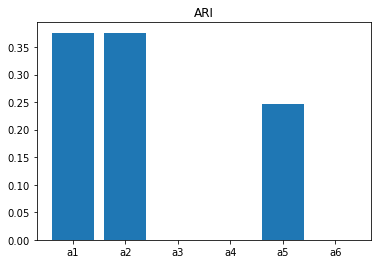

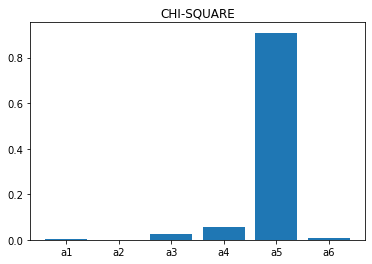

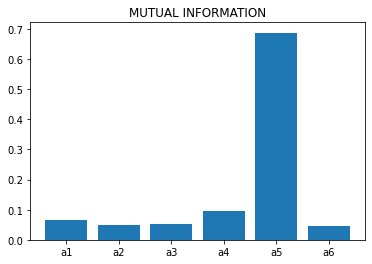

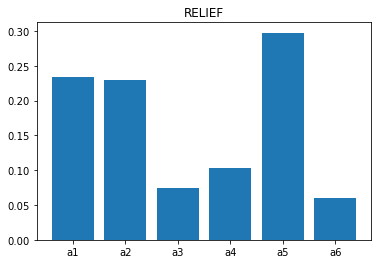

   ari & 0.38 & 0.38 & 0.0 & 0.0 & 0.25 & 0.0\\
  chi2 & 0.0 & 0.0 & 0.02 & 0.06 & 0.91 & 0.01\\
    mi & 0.06 & 0.05 & 0.05 & 0.1 & 0.69 & 0.05\\
relief & 0.23 & 0.23 & 0.07 & 0.1 & 0.3 & 0.06\\
2-monks-2.csv
****INFORMATION ON INITIAL DATA *******
dataset: datasets-tested/2-monks-2.csv size: 601 dimension: 6
480


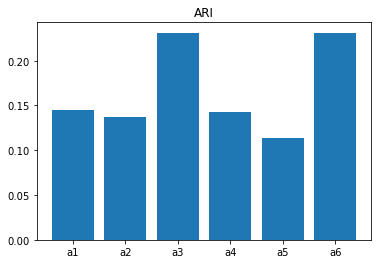

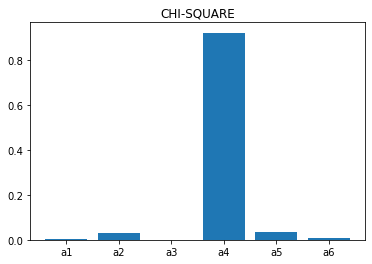

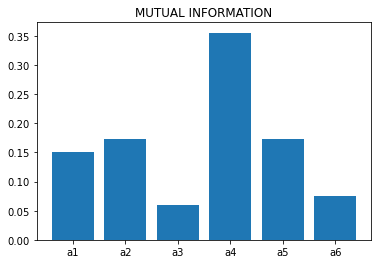

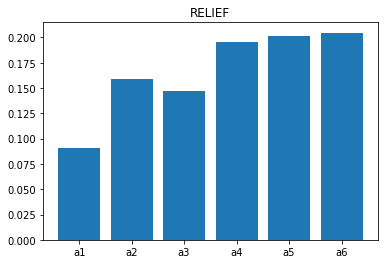

   ari & 0.14 & 0.14 & 0.23 & 0.14 & 0.11 & 0.23\\
  chi2 & 0.0 & 0.03 & 0.0 & 0.92 & 0.03 & 0.01\\
    mi & 0.15 & 0.17 & 0.06 & 0.36 & 0.17 & 0.08\\
relief & 0.09 & 0.16 & 0.15 & 0.2 & 0.2 & 0.2\\
3-monks-3.csv
****INFORMATION ON INITIAL DATA *******
dataset: datasets-tested/3-monks-3.csv size: 554 dimension: 6
443


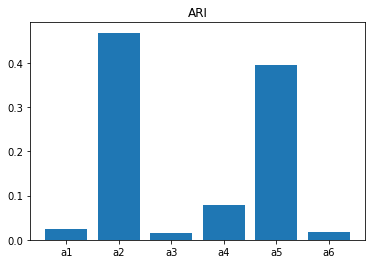

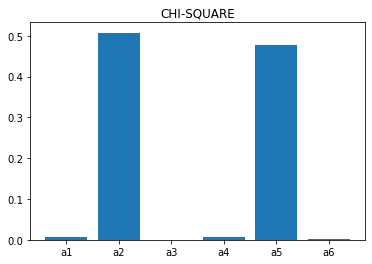

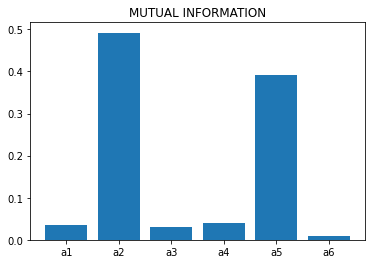

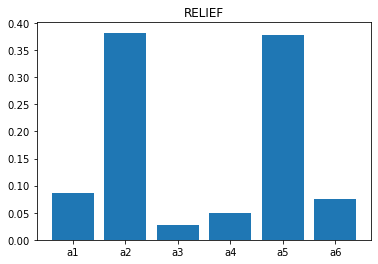

   ari & 0.03 & 0.47 & 0.02 & 0.08 & 0.39 & 0.02\\
  chi2 & 0.01 & 0.51 & 0.0 & 0.01 & 0.48 & 0.0\\
    mi & 0.04 & 0.49 & 0.03 & 0.04 & 0.39 & 0.01\\
relief & 0.09 & 0.38 & 0.03 & 0.05 & 0.38 & 0.08\\
4-breast-cancer.csv
****INFORMATION ON INITIAL DATA *******
dataset: datasets-tested/4-breast-cancer.csv size: 277 dimension: 9
221


In [ ]:
number_of_test = 10
sample_ratio   = 0.8   #THERE IS AN ISSUE HERE AS I DO NOT UNDERSTAND TRAIN/TEST SAMPLE_RATIO

tested_folder="datasets-tested/"
for filename in os.listdir(tested_folder):
    print(filename)
    if filename==".DS_Store":
        continue
    compare_score_on_dataset(tested_folder+filename,number_of_test,sample_ratio)

## ACTION 11: Comparing feature relevance score effectiveness on logistic regression
The following block relates to Section 5.4.2 of the paper  (Table 3).

In [10]:
def test_binary_dataset(filename,k): #comparing accuracies by running logistic regression on k best features
    dataset, X, y, dimension = load_dataset(filename)
    print("data shape:",X.shape, "dimension", dimension,"nb of best features:",k)
    FOLDS=10
    list_of_attributes=[]
    for i in range(dimension):
        list_of_attributes.append(i)
    acc_baseline_all_features=baseline_for_binary_with_all(X, y,FOLDS) #10 fold cross valid
    list_of_accuracy_ari=[]
    list_of_accuracy_chi2=[]
    list_of_accuracy_mi=[]
    list_of_accuracy_relief=[]
    skf = StratifiedKFold(n_splits=FOLDS, shuffle=True)
    for train, test in skf.split(X,y):
        #print("****************")
        X_train_chi2, X_test_chi2, _ = select_k_features_chi2(X[train], y[train], X[test], k)
        X_train_mi, X_test_mi, _ = select_k_features_mi(X[train], y[train], X[test], k)
        r = relief.Relief(n_features=k)
        X_train_relief = r.fit_transform(X[train], y[train])
        X_test_relief = r.fit_transform(X[test], y[test])              
    # ARI feature selection
        #create A : list of attribute as index 0, 1, ...
        list_of_attributes=[]
        for i in range(dimension):
            list_of_attributes.append(i)
        sample_set = dataset[train]
        list_of_pairs = all_pairs(sample_set)
        ari_scores = select_features_ari(dimension,list_of_attributes,sample_set,list_of_pairs)
        s = numpy.array(ari_scores)
        sort_index = np.argsort(s)
        print(sort_index)
        print(ari_scores)
        #transform the dataset to keep only the k relevant features
        
        a=accuracy(X_train_ari,y[train],X_test_ari,y[test])
        list_of_accuracy_ari.append(a)   
    # CHI2
        a=accuracy(X_train_chi2,y[train],X_test_chi2,y[test])
        list_of_accuracy_chi2.append(a)
        print("  chi2",a)   
    # MI 
        a=accuracy(X_train_mi,y[train],X_test_mi,y[test])
        list_of_accuracy_mi.append(a)
        #print("    mi",a)
    # RELIEF
        a=accuracy(X_train_relief,y[train],X_test_relief,y[test])
        list_of_accuracy_relief.append(a)
        #print("relief",a)
        
    acc_ari   = mean(list_of_accuracy_ari)
    acc_chi2  = mean(list_of_accuracy_chi2)
    acc_mi    = mean(list_of_accuracy_mi)
    acc_relief= mean(list_of_accuracy_relief)
    return(acc_baseline_all_features,acc_ari,acc_chi2,acc_mi,acc_relief)


def test_categorical_dataset(filename,k):  
    dataset, X, y, dimension = load_dataset(filename)
    print("data shape:",X.shape, "dimension", dimension,"nb of used best features:",k)
    FOLDS=10
    list_of_attributes=[]
    
    for i in range(dimension):
        list_of_attributes.append(i)
    
    acc_baseline_all_features=baseline_for_categorical_with_all(X,y,FOLDS) #10 fold cross valid
    
    list_of_accuracy_ari=[]
    list_of_accuracy_chi2=[]
    list_of_accuracy_mi=[]
    list_of_accuracy_relief=[]
    skf = StratifiedKFold(n_splits=FOLDS, shuffle=True)
    X_enc=prepare_input(X)
    y_enc=prepare_target(y)
       
    fold_count=1
    #Iterate for each fold     
    for train, test in skf.split(X_enc,y_enc):
        print("fold", fold_count, " ", end="")
        fold_count += 1
        X_train_chi2_enc, X_test_chi2_enc, _ = select_k_features_chi2(X_enc[train], y_enc[train], X_enc[test], k)
        X_train_mi_enc, X_test_mi_enc, _ = select_k_features_mi(X_enc[train], y_enc[train], X_enc[test], k)
        r = relief.Relief(n_features=k)
        X_train_relief_enc = r.fit_transform(X_enc[train], y_enc[train])
        X_test_relief_enc = r.fit_transform(X_enc[test], y_enc[test])    
    # ARI feature selection
        #create A : list of attribute as index 0, 1, ...
        list_of_attributes=[]
        for i in range(dimension):
            list_of_attributes.append(i)
        sample_set = dataset[train]
        list_of_pairs = all_pairs(sample_set)
        ari_scores = select_features_ari(dimension,list_of_attributes,sample_set,list_of_pairs)
        s = np.array(ari_scores)
        sort_index = np.argsort(s)
        sort_index=np.flipud(sort_index)
        #print("ari index",sort_index)
        #print("ari scores:",ari_scores)
        # transform the dataset to keep only the k relevant features
        X_train_ari_enc = np.delete(X_enc[train], sort_index[0:k],axis=1)
        X_test_ari_enc  = np.delete(X_enc[test],sort_index[0:k],axis=1)
        a=accuracy(X_train_ari_enc,y_enc[train],X_test_ari_enc,y_enc[test])
        list_of_accuracy_ari.append(a)  
    # CHI2 feature selection
        a=accuracy(X_train_chi2_enc,y_enc[train],X_test_chi2_enc,y_enc[test])
        list_of_accuracy_chi2.append(a)
    # MI feature selection
        a=accuracy(X_train_mi_enc,y_enc[train],X_test_mi_enc,y_enc[test])
        list_of_accuracy_mi.append(a)
    # RELIEF
        a=accuracy(X_train_relief_enc,y_enc[train],X_test_relief_enc,y_enc[test])
        list_of_accuracy_relief.append(a)
        
    print("")
    acc_ari   = mean(list_of_accuracy_ari)
    acc_chi2  = mean(list_of_accuracy_chi2)
    acc_mi    = mean(list_of_accuracy_mi)
    acc_relief= mean(list_of_accuracy_relief)
    return(acc_baseline_all_features,acc_ari,acc_chi2,acc_mi,acc_relief)

In [11]:
#convert to percentage rounded to 2 decimal points
def to_perc(number):
    return f'{number * 100:.2f}'

data_path="datasets-tested/"
file_to_be_tested=os.listdir(data_path)
for filename in file_to_be_tested:
    dataset = read_csv(data_path+filename, header=None)
    data = dataset.values
    dimension=data.shape[1] - 1
    
    #k_list= [dimension//5, dimension//4,dimension//3, dimension//2, dimension-1]
    k_list =[4]
    k_list=list(set(k_list))
    print("Tested dataset:",filename,"- dimension:",dimension," - k best dimension tested:",k_list)
    for num in k_list:
        if num>=1:
         acc_baseline_all_features,acc_ari,acc_chi2,acc_mi,acc_relief=test_categorical_dataset(data_path+filename,num)
         #print("all:",acc_baseline_all_features," - ari:",acc_ari," - chi2:",acc_chi2," - mi:",acc_mi," - relief:",acc_relief)
         
         print("all:",       to_perc(acc_baseline_all_features),
               " - ari:",    to_perc(acc_ari),
               " - chi2:",   to_perc(acc_chi2),
               " - mi:",     to_perc(acc_mi),
               " - relief:", to_perc(acc_relief))
         print("")   
            

Tested dataset: 1-monks-1.csv - dimension: 6  - k best dimension tested: [4]
data shape: (432, 6) dimension 6 nb of used best features: 4
fold 1  fold 2  fold 3  fold 4  fold 5  fold 6  fold 7  fold 8  fold 9  fold 10  
all: 66.68  - ari: 41.65  - chi2: 66.68  - mi: 66.68  - relief: 52.57

Tested dataset: 2-monks-2.csv - dimension: 6  - k best dimension tested: [4]
data shape: (601, 6) dimension 6 nb of used best features: 4
fold 1  fold 2  fold 3  fold 4  fold 5  fold 6  fold 7  fold 8  fold 9  fold 10  
all: 63.72  - ari: 65.72  - chi2: 64.22  - mi: 65.39  - relief: 64.56

Tested dataset: 3-monks-3.csv - dimension: 6  - k best dimension tested: [4]
data shape: (554, 6) dimension 6 nb of used best features: 4
fold 1  fold 2  fold 3  fold 4  fold 5  fold 6  fold 7  fold 8  fold 9  fold 10  
all: 76.35  - ari: 49.27  - chi2: 76.16  - mi: 75.98  - relief: 76.53

Tested dataset: 4-breast-cancer.csv - dimension: 9  - k best dimension tested: [4]
data shape: (277, 9) dimension 9 nb of used 